In [2]:
from nilearn import plotting, surface, image

In [3]:
surf_file = 'lh.pial'
brain_file = 'brain.mgz'
label_file = 'mylabels_FSspace.mgz'

In [4]:
# brain.mgz and lh.pial were produced by FreeSurfer's recon-all
#
# mylabels.nii.gz are labels defined in native space MRI, 
# and they were transformed into the same space as brain.mgz using:
# mri_vol2vol --mov mylabels.nii.gz --targ brain.mgz --regheader --nearest --o mylabels_FSspace.mgz

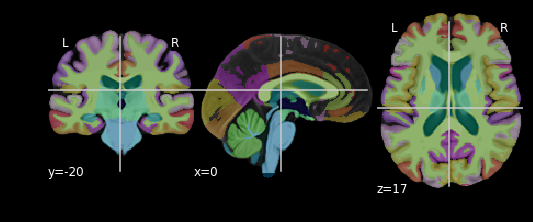

In [5]:
# verify that brain.mgz and mylabels_FSspace.mgz are actually in the same space
plotting.plot_roi(label_file, bg_img=brain_file, alpha=.3)
plotting.show()

In [6]:
brain = image.load_img(brain_file)
label = image.load_img(label_file)

# also verify that their affines match
print(brain.affine)
print(label.affine)

[[  -1.    0.    0.  127.]
 [   0.    0.    1. -146.]
 [   0.   -1.    0.  147.]
 [   0.    0.    0.    1.]]
[[  -1.    0.    0.  127.]
 [   0.    0.    1. -146.]
 [   0.   -1.    0.  147.]
 [   0.    0.    0.    1.]]


In [7]:
# project labels onto lh.pial, which should be in the same space as brain.mgz

# load lh.pial surface mesh
coords, faces = surface.load_surf_mesh(surf_file)
# create a brain mask
mask = image.math_img('img>0', img=label)
# project labels onto surface
projected_labels = surface.vol_to_surf(label, [coords, faces], interpolation='nearest', mask_img=mask)

In [8]:
# there are nan's in projected labels
projected_labels

array([ 84. ,  89.1,  94.2, ..., 203. ,   nan,   nan])

/Users/bilgelm/anaconda/envs/python3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/bilgelm/anaconda/envs/python3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median for 58089 results
  r = func(a, **kwargs)
/Users/bilgelm/anaconda/envs/python3.6/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


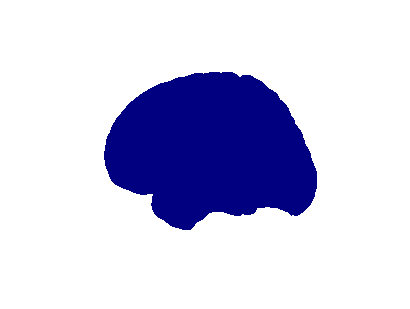

In [9]:
plotting.plot_surf_roi([coords, faces], projected_labels)

# this is not how projected labels should look

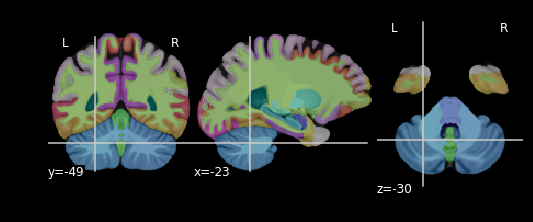

In [17]:
# checking out surface mesh coordinates -- 
plotting.plot_roi(label_file, bg_img=brain_file, alpha=.3, cut_coords=coords[15000,:])
plotting.show()

# there shouldn't be a mesh vertex in the cerebellum!
# so surface coordinate system is not "in alignment" with the volumetric data, but why is that? 
# brain.mgz and lh.pial (as generated by recon-all) should be in same space. 
# Is something off with how the data are being loaded by nilearn ?